# Статистический анализ о прокате самокатов.

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

    без подписки
        абонентская плата отсутствует;
        стоимость одной минуты поездки — 8 рублей;
        стоимость старта (начала поездки) — 50 рублей;
    
    с подпиской Ultra
        абонентская плата — 199 рублей в месяц;
        стоимость одной минуты поездки — 6 рублей;
        стоимость старта — бесплатно.
        
        Цели исследования проверить гипотезы:
    6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
    6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
    6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
    6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
        
**Ход исследования**
        
        Данные о прокате самокатов я получу из 3 файлов, где есть информация о пользователях, их поездках и подписках. О качестве данных ничего не известно. Поэтому перед тем как приступать к целям, понадобится обзор данных.
        
        Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предообработки я по возможности исправлю все ошибки в данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы, и приступлю к проведению анализа.
        
        Таким образом, мой анализ пройдет в несколько этапов:
        
        - обзор данных;
        - предообработка данных;
        - расчеты и добавление результатов в таблицу;
        - проведение анализа для категории с подпиской и без подписки;
        - проверка гипотез;
        - написание общего вывода.

In [1]:
import pandas as pd # импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [7]:
def info_head(file):
    '''Информация о данных и первые 5 строк, переменная файл'''
    
    print("=== Информация о данных (info) ===")
    file.info()
    print("\n=== Первые 5 строк (head) ===")
    display(file.head())

In [27]:
def diagram_pie(file, column):
    '''для построения круговой диаграммы категориальных признаков в файле'''
    
    plt.figure(figsize=(6, 4))
    
    # Построение круговой диаграммы
    file[column].value_counts().plot(
        kind='pie',
        colors=sns.color_palette('pastel')[0:len(file[column].unique())],
        autopct="%.1f%%",
        ylabel="",
        textprops={'fontsize': 12}
    )
    
    plt.title(f'Соотношение по: "{column}"', fontsize=16)
    plt.tight_layout()
    plt.show()

In [31]:
def hist_and_box(file, col):
    '''функция для построения гистограммы и ящика, переменные файл и категория'''
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Гистограмма
    sns.histplot(file[col], ax=axes[0], color='#B57EDC')
    axes[0].set_title(f'Гистограмма по "{col}"')
    axes[0].set_ylabel('Частота')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=file[col], ax=axes[1], color='#B57EDC')
    axes[1].set_title('Boxplot')
    
    plt.tight_layout()
    plt.show()

#### Загрузка данных

In [3]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv') # чтение файла о пользователях

In [4]:
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv') # чтение файла о поездках

In [5]:
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv') # чтение файла о тарифах

In [8]:
info_head(users) # общая информация о пользователях

=== Информация о данных (info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

=== Первые 5 строк (head) ===


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [9]:
info_head(rides) # общая информация о поездках

=== Информация о данных (info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB

=== Первые 5 строк (head) ===


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [10]:
info_head(subscriptions) # общая информация о подписках

=== Информация о данных (info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes

=== Первые 5 строк (head) ===


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Открыв и изучив 3 файла с данными, мы видим информацию о 1'565 пользователях в разных городах, совершивших 18'068 поездок. В файле с информацией о поездке, указан неверный формат даты, ниже приведем его в корретный вид. Данные также содержат информацию о тарифах. **Во всех данных нет пропусков.**

#### Предобработка данных

##### Приведение столбца date к типу даты pandas.

In [11]:
# переводим значения 'date' в формат datetime
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') 

##### Создание нового столбца с номером месяца на основе столбца date.

In [13]:
# проверяем за один ли год собраны данные, чтобы месяц был корректно указан
pd.DatetimeIndex(rides['date']).year.unique()

Int64Index([2021], dtype='int64', name='date')

In [14]:
rides['month'] = pd.DatetimeIndex(rides['date']).month

In [15]:
rides.head() # проверим, что получилось

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


##### Проверка на наличие пропущенных значений и дубликатов в датафреймах

Как мы уже выяснили, пропущенных значений в данных нет, проверим наличие дубликатов.

In [16]:
users.duplicated().sum() # проверяем явные дубликаты в данных 'users'

31

In [17]:
# удаляем дубликаты и обновляем индексы в столбце
users = users.drop_duplicates().reset_index(drop=True)

In [18]:
rides.duplicated().sum() # проверяем явные дубликаты в данных 'rides'

0

   ***Вывод по обработке данных:*** 
        
        - в файле 'users' был исправлен формат данных в столбце 'date' и удалены явные дубликаты;
        - в файле 'rides' не оказалось дубликатов;
        - в файле 'subscriptions' всего две строчки с данными о тарифах, дубликатов нет.

In [19]:
rides['distance'] = round(rides['distance'], 2) # округлим расстояние поездок

In [20]:
rides['distance'].head(3) # проверяем округление

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

#### Исследовательский анализ данных

##### Частота встречаемости городов

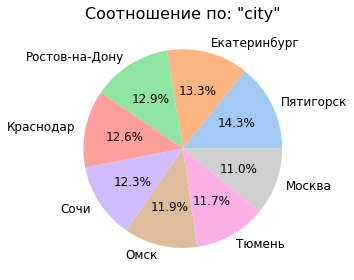

In [28]:
diagram_pie(users, 'city')

В данных проката самокатов представлены 8 городов, самая большая представленность в Пятигорске - 14%, самая маленькая в Москве - 11%, число пользователей распределено практически равномерно между городами.

##### Cоотношение пользователей с подпиской и без подписки

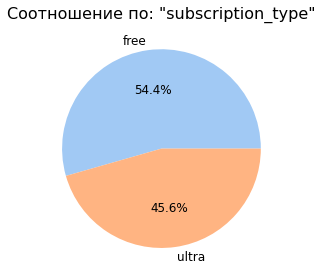

In [29]:
diagram_pie(users, 'subscription_type')

Пользователей без подписки 54.4%,  пользователей с подпиской ultra - 45.6%.

##### Возраст пользователей

In [30]:
users['age'].describe() # посмотрим данные о возрасте пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

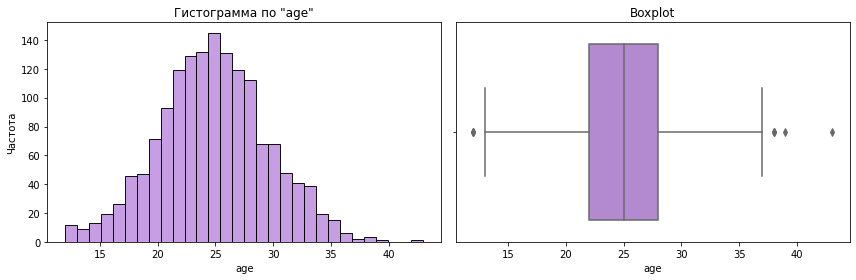

In [32]:
hist_and_box(users, 'age')

Основая часть пользователей в возрасте от 22 до 28 лет, минимальный и максимальный возраст 12 лет и 43 года, соответственно. На боксплот заметен выброс в 12 лет, и старше 37 лет. 

Следует отметить, что среди пользователей некоторым менее 18 лет, именно с этого возраста разрешен прокат самокатов. В некоторых компаниях и регионах разрешено с 14 лет, но при письменном согласии родителей. В датасете минимальный возраст 12 лет, это явное нарушение существующих норм. 

##### Расстояние, которое пользователь преодолел за одну поездку

In [38]:
rides['distance'].describe() # посмотрим информацию о расстоянии поездок

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

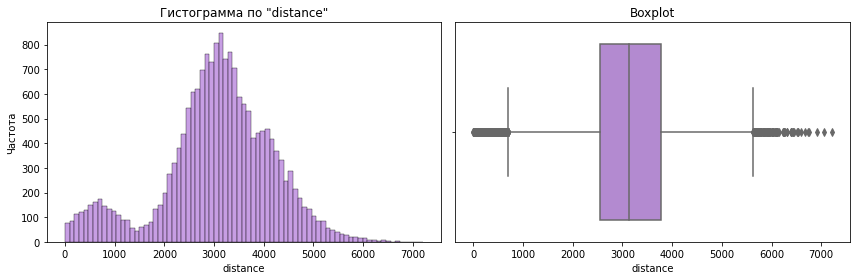

In [33]:
hist_and_box(rides, 'distance')

В среднем за одну поездку пользователь проезжает 3,1 км, большая часть поездок находится в диапозоне от 2,5 км до 3,8 км. На графике видно два пика в 500 м и 3,1 км. Возможно поездки в 500 м совершают пользователи, добирающиеся до работы (от метро или от дома). На боксплот заметны выбросы, меньше 800 м и больше 5,5км.

##### Продолжительность поездок

In [40]:
rides['duration'].describe() # посмотрим информацию о продолжительности поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

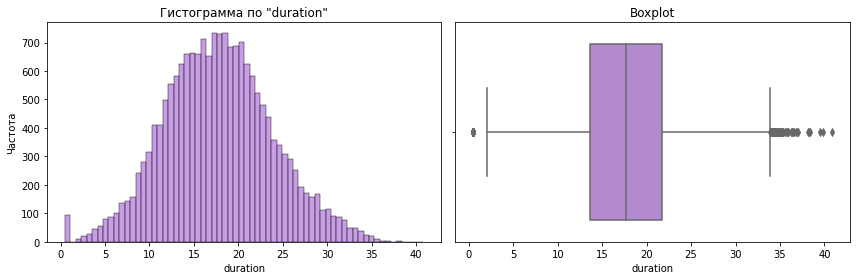

In [34]:
hist_and_box(rides, 'duration')

В среднем поездки длятся почти 18 минут, большая часть поездок в диапозоне от 13 до 22 минут, есть 'короткие' поездки, меньше 1 минуты. На боксплот заметны несколько выбросов меньше 1 минуты (короткие поездки) и больше 34 минут. 

***Выводы по исследовательскому анализу:***
       
- В данных проката самокатов представлены 8 городов, самая большая представленность в Пятигорске - 14%, самая маленькая в Москве - 11%, число пользователей распределено практически равномерно между городами.
- Пользователей без подписки 54.4%,  пользователей с подпиской ultra - 45.6%.
- Основая часть пользователей в возрасте от 22 до 28 лет, минимальный и максимальный возраст 12 лет и 43 года, соответственно. На боксплот заметен выброс в 12 лет, и старше 37 лет. Следует отметить, что среди пользователей некоторым менее 18 лет, именно с этого возраста разрешен прокат самокатов. В некоторых компаниях и регионах разрешено с 14 лет, но при письменном согласии родителей. В датасете минимальный возраст 12 лет, это явное нарушение существующих норм. 
- В среднем за одну поездку пользователь проезжает 3,1 км, большая часть поездок находится в диапозоне от 2,5 км до 3,8 км. На графике видно два пика в 500 м и 3,1 км. Возможно поездки в 500 м совершают пользователи, добирающиеся до работы (от метро или от дома). На боксплот заметны выбросы, меньше 800 м и больше 5,5км.
- В среднем поездки длятся почти 18 минут, большая часть поездок в диапозоне от 13 до 22 минут, есть 'короткие' поездки, меньше 1 минуты. На боксплот заметны несколько выбросов меньше 1 минуты (короткие поездки) и больше 34 минут. 

#### Объединение данных

##### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [42]:
# объединяем данные 'users' и 'rides' в один файл 'data', по столбцу 'user_id'
data = users.merge(rides, on='user_id', how='left')

In [43]:
# объединяем данные 'data' и 'subscriptions' в один файл, по столбцу 'subscription_type'
data = data.merge(subscriptions, on='subscription_type', how='left')

In [44]:
data.head() # проверяем, что получилось

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199


In [45]:
data.shape[0] # проверяем количество строк после объединения, 18'068 строчек было в исходном файле

18068

In [46]:
data.info() # проверяем пропуски после объединения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


##### Разделение данных о пользователях с подпиской и без подписки.

In [47]:
# выделим данные о пользователях без подписки в отдельный датафрейм
data_free = data[data['subscription_type'] == 'free']

In [48]:
data_free.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.016628,2021-02-04,2,8,50,0


In [49]:
# выделим данные о пользователях с подпиской ultra в отдельный датафрейм
data_ultra = data[data['subscription_type'] == 'ultra']

In [50]:
data_ultra.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

 - визуализируем расстояние, которое проезжает пользователь без подписки и с подпиской ultra

In [51]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [53]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

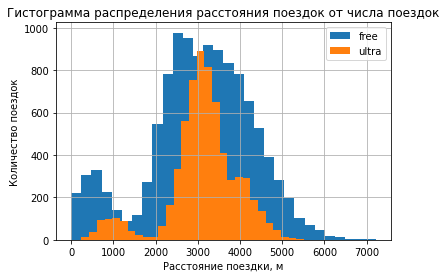

In [54]:
ax = data_free.plot(kind='hist', y='distance', bins=30, linewidth=5, label='free')
data_ultra.plot(kind='hist', y='distance', bins=30, linewidth=5, label='ultra',
                ax=ax, grid=True, legend=True)
plt.title('Гистограмма распределения расстояния поездок от числа поездок')
plt.xlabel('Расстояние поездки, м')
plt.ylabel('Количество поездок');

Расстояние, которое проезжают пользователи без подписки в диапозоне 2,4-3,9км, с подпиской ultra - 2,8-3,6км, среднее расстояние около 3,1км, это скорее всего обычные прогулки. У всех пользователей есть вторые пики на более короткие расстояния в 0,5 км (без подписки) и 1км (с подпиской ultra), скорее это короткие поездки до работы, до магазина.

 - визуализируем время (продолжительность одной поездки), которое проезжает пользователь без подписки и с подпиской ultra

In [56]:
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [58]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

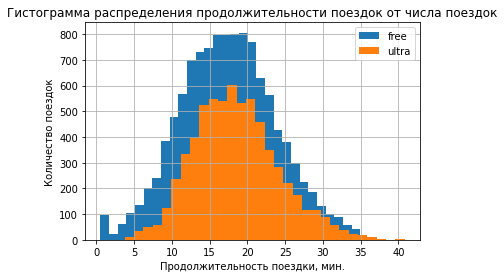

In [60]:
ax = data_free.plot(kind='hist', y='duration', bins=30, linewidth=5, label='free')
data_ultra.plot(kind='hist', y='duration', bins=30, linewidth=5, label='ultra',
                ax=ax, grid=True, legend=True)
plt.title('Гистограмма распределения продолжительности поездок от числа поездок')
plt.xlabel('Продолжительность поездки, мин.')
plt.ylabel('Количество поездок');

Среднее время поездок у всех пользователей примерно равное - 18 минут. Большая часть поездок находится в диапозоне от 13 до 22 минут (без подписки), от 15 до 22 минут(с подпиской ultra). Минимальное время отличается: 0,5 минут у пользователей без подписки, 4 минуты у пользователей с подпиской ultra. На гистограмме видны 100 значений 'коротких' поездок, длительностью 1 минута у пользователей без подписки.

#### Подсчёт выручки

##### Создание датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [61]:
data.head() # посмотрим исходные данные

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199


In [62]:
data['duration'] = np.ceil(data['duration']) # округлим до следующего целого числа время каждой поездки

In [63]:
# построим сводную таблицу по id и месяцам, посчитаем количество поездок, суммарное расстояние и время
pivot_data = data.pivot_table(index=['user_id', 'month'], values=['duration', 'distance'], aggfunc=['count', 'sum'])

In [64]:
pivot_data = pivot_data.reset_index() # отобразим id на каждой строчке сводной таблицы

In [65]:
pivot_data.columns = ['user_id', 'month', 'count', 'count0', 'total_distance', 'total_duration'] # переименуем столбцы

In [66]:
pivot_data = pivot_data.drop('count0', axis=1) # удалим задвоенный столбец с количеством

In [67]:
pivot_data.head() # посмотрим получившуюся сводную таблицу

,user_id,month,count,total_distance,total_duration
0,1,1,2,7027.51,42.0
1,1,4,1,754.16,7.0
2,1,8,2,6723.47,46.0
3,1,10,2,5809.91,32.0
4,1,11,3,7003.50,56.0


In [68]:
pivot_data.info() # проверяем новую сводную таблицу на наличие пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         11331 non-null  int64  
 1   month           11331 non-null  int64  
 2   count           11331 non-null  int64  
 3   total_distance  11331 non-null  float64
 4   total_duration  11331 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 442.7 KB


##### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.

In [69]:
pivot_data = pivot_data.merge(users, on='user_id') # добавляем в сводную таблицу информацию о пользователях, виде подписки

In [70]:
pivot_data = pivot_data.merge(subscriptions, on='subscription_type') # добавляем в сводную таблицу условия подписки, тарифы

In [71]:
# считаем выручку
pivot_data['revenue'] = pivot_data['count'] * pivot_data['start_ride_price'] + pivot_data['total_duration'] * pivot_data['minute_price'] + pivot_data['subscription_fee']

In [72]:
pivot_data = pivot_data.drop(['age', 'city'], axis=1) # удалим ненужные столбцы из сводной таблицы

In [73]:
pivot_data.head() # проверяем

,user_id,month,count,total_distance,total_duration,name,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.51,42.0,Кира,ultra,6,0,199,451.0
1,1,4,1,754.16,7.0,Кира,ultra,6,0,199,241.0
2,1,8,2,6723.47,46.0,Кира,ultra,6,0,199,475.0
3,1,10,2,5809.91,32.0,Кира,ultra,6,0,199,391.0
4,1,11,3,7003.50,56.0,Кира,ultra,6,0,199,535.0


In [74]:
# построим сводную таблицу с выручкой за каждый месяц в зависимости от типа подписки
pivot_data_month = pivot_data.pivot_table(index=['month'], columns = 'subscription_type', values='revenue', aggfunc='sum')

In [75]:
pivot_data_month

subscription_type,free,ultra
month,,
1,193850.0,144108.0
2,165856.0,124572.0
3,187214.0,142608.0
4,185598.0,137318.0
5,188030.0,149235.0
6,192144.0,143834.0
7,185038.0,143466.0
8,187116.0,138534.0
9,193700.0,129337.0


In [76]:
pivot_data_month.columns = ['revenue_free', 'revenue_ultra'] # переименовываем столбцы

Найдем значение средней ежемесячной оплаты от пользователей в зависимости от вида подписки. Для этого разделим помесячную выручку на число пользователей без подписки и с подпиской, соответственно.

In [79]:
pivot_data_month['average_revenue_free'] = round(pivot_data_month['revenue_free'] / users['subscription_type'].value_counts()['free'], 1)

In [80]:
pivot_data_month['average_revenue_ultra'] = round(pivot_data_month['revenue_ultra'] / users['subscription_type'].value_counts()['ultra'], 1)

In [81]:
# добавим столбец разницы средней выручки пользователя в процентах 
pivot_data_month['ratio'] = round((1 - pivot_data_month['average_revenue_ultra'] / pivot_data_month['average_revenue_free']) * 100, 0)

In [82]:
pivot_data_month

,revenue_free,revenue_ultra,average_revenue_free,average_revenue_ultra,ratio
month,,,,,
1,193850.0,144108.0,232.2,206.2,11.0
2,165856.0,124572.0,198.6,178.2,10.0
3,187214.0,142608.0,224.2,204.0,9.0
4,185598.0,137318.0,222.3,196.4,12.0
5,188030.0,149235.0,225.2,213.5,5.0
6,192144.0,143834.0,230.1,205.8,11.0
7,185038.0,143466.0,221.6,205.2,7.0
8,187116.0,138534.0,224.1,198.2,12.0
9,193700.0,129337.0,232.0,185.0,20.0


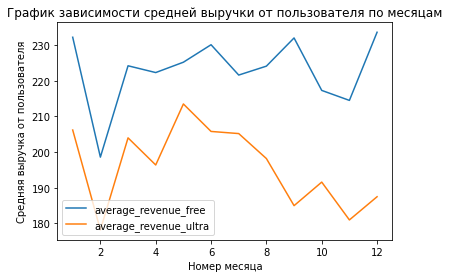

In [83]:
pivot_data_month['average_revenue_free'].plot(legend=True)
pivot_data_month['average_revenue_ultra'].plot(legend=True)
plt.title('График зависимости средней выручки от пользователя по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Средняя выручка от пользователя');

In [84]:
pivot_data_month['revenue_free'].sum()

2234104.0

In [85]:
pivot_data_month['revenue_ultra'].sum()

1644537.0

***Выводы***
Выручка от пользователей без подписки выше на 5-20% в зависимости от месяца, чем от пользователей с подпиской ultra.

#### Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Примем за нулевую гипотезу, что пользователи с подпиской тратят столько же времени на поездки, как и пользователи без подписки.
За альтернативную гипотезу (одностороннюю) примем, что пользователи с подпиской тратят *больше* времени на поездки, чем пользователи без подписки.

In [87]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

In [88]:
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

In [89]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


***Вывод:***
Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу.

За нулевую гипотезу примем, что расстояние одной поездки пользователей с подпиской равно 3130 метрам. За альтернативую, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [94]:
distance_value = 3130 # оптимальное расстояние одной поездки

In [95]:
alpha = 0.05 # уровень статистической значимости

In [96]:
results = st.ttest_1samp(data_ultra['distance'], distance_value, alternative='greater')

In [97]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: расстояние меньше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


In [98]:
data_ultra['distance'].mean() # найдем среднее значение расстояния поездок пользователей с подпиской

3115.445430769231

***Вывод*** Полученное р-значение, выше заданного уровня значимости, поэтому нельзя отвергать нулевую гипотезу. Т.е. среднее расстояние одной поездки пользователей с подпиской приближено к 3130 метрам, т.е. не превышает 3130 метров.

##### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Примем за нулевую гипотезу, что помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки. За альтернативную, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Подготовим данные для проверки гипотезы:

In [101]:
ultra = pivot_data[pivot_data['subscription_type'] == 'ultra'] # сделаем срез пользователей с подпиской
ultra.head(2)

,user_id,month,count,total_distance,total_duration,name,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.51,42.0,Кира,ultra,6,0,199,451.0
1,1,4,1,754.16,7.0,Кира,ultra,6,0,199,241.0


In [102]:
free = pivot_data[pivot_data['subscription_type'] == 'free'] # сделаем срез пользователей без подписки
free.head(2)

,user_id,month,count,total_distance,total_duration,name,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
4533,700,1,1,2515.69,15.0,Айдар,free,8,50,0,170.0
4534,700,2,5,13446.65,89.0,Айдар,free,8,50,0,962.0


In [103]:
alpha = 0.05 # уровень статистической значимости

In [104]:
results = st.ttest_ind(ultra['revenue'], free['revenue'], alternative='greater')

In [105]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


***Вывод*** Полученное р-значение, ниже заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания утверждать, что помесячная выручка от пользователей с подпиской по месяцам больше выручки от пользователей без подписки.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу применим метод **scipy.stats.ttest_rel(before, after)** о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python. За нулевую гипотезу принять, что количество обращений в техподдержку после обновления сервера  осталось прежним. За альтернативную гипотезу принять, что количество обращений снизилось, такая гипотеза будет односторонней. Необходимо будет найти значение p-value, если оно будет ниже 5% (или 1%), то нулевую гипотезу следует отвергнуть.

#### Выводы

1. Выполнила предообработку данных: скорректировала формат данных в столбце 'date', добавила столбец месяца для анализа, проверила и удалила дубликаты в файле с информацией о пользователях, проверила данные на наличие пропусков.


2. Выполнила исследовательский анализ, в ходе которого выяснила:
      
   - В данных проката самокатов представлены 8 городов России, всего данные содержат информацию о 1'534 пользователях, из них 835 пользователей без подписки, 699 пользователей пользуются подпиской ultra.
   - Средний возраст пользователей 25 лет, основая часть пользователей в возрасте от 22 до 28 лет, минимальный и максимальный возраст 12 лет и 43 года, соответственно. Возраст меньше 14 лет явная аномалия. Также отмечу, что сейчас сервисы аренды самоката начали блокировать пользователей младше 18 лет (детям с 14 лет разрешено пользоваться собственным электросамокатом).
   - Среднее расстояние одной поездки 3,1 км, большая часть поездок находится в диапозоне от 2,5 км до 3,8 км. Есть короткие поездки 0,5 и 1км, скорее всего это постоянные поездки до работы, магазина.
   - Средняя продолжительность поездки 18 минут, большая часть поездок в диапозоне от 13 до 22 минут, есть 'короткие' поездки, меньше 1 минуты. 
     
     
3. Объединила все данные о пользователях, поездках и подписках в один датафрейм, создала отдельные файлы с данными по пользователям с подпиской и пользователям без подписки, построила графики и выявила следующие закономерности:

   - Расстояние, которое проезжают пользователи без подписки в диапозоне 2,4-3,9км, с подпиской ultra - 2,8-3,6км, среднее расстояние около 3,1км, это скорее всего обычные прогулки. У всех пользователей есть вторые пики на более короткие расстояния в 0,5 км (без подписки) и 1км (с подпиской ultra), скорее это короткие поездки до работы, до магазина. 

   - Среднее время поездок у всех пользователей примерно равное - 18 минут. Большая часть поездок находится в диапозоне от 13 до 22 минут (без подписки), от 15 до 22 минут(с подпиской ultra). Минимальное время отличается: 0,5 минут у пользователей без подписки, 4 минуты у пользователей с подпиской ultra.
     
     
4. Подсчитала выручку пользователей с подпиской и без подписки, общая выручка пользователей с подпиской - 1'644'537, без подписки - 2'234'104.
  При подсчете выручки была взята ежемесячная оплата (для пользователей с подпиской) только за месяцы, в которые пользователь совершал поездки.
  
  
5. Проверила гипотезы:

   - тратят ли пользователи с подпиской больше времени на поездки? 
*Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки, т.е. они 'выгоднее'.*
   - расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

*Да, гипотеза потвердилась, среднее расстояние одной поездки пользователей с подпиской приближено к 3130 метрам, т.е. не превышает 3130 метров.*
   - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? 

*Есть основания утверждать, что помесячная выручка от пользователей с подпиской по месяцам больше выручки от пользователей без подписки.*
   - ситуация: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

*scipy.stats.ttest_rel(before, after)*
  
  **Рекомендации**: дополнительно проверить таймер отсчета времени, ужесточить контроль по возрасту пользователей, заблокировать пользователей младше 18 лет. Обратить внимание на короткие поездки, если это регулярные поездки у одного и того же пользователя без подписки, предложить воспользоваться подпиской.